# VIII. Machine Learning Part III: Prediction Using Libraries

## Unseen Data

Last time we built a neural network from scratch and calibrated it to the XOR operator sucessfully. Today, we will be dealing with the problem of correctly predicting the output of **unseen** data.

This process is what inspires the term **machine learning**: a few *training samples* are given to the numerical method, which serve to calibrate it &mdash; it *learns* the pattern. Afterwards, it is able to correctly guess the output of data it has not seen before &mdash; almost like passing an exam.

## The Iris Dataset

We will be following [Jason Brownlee's tutorial](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/) on the Irist dataset &mdash; hosted [here](https://archive.ics.uci.edu/ml/datasets/Iris), more information [here](https://en.wikipedia.org/wiki/Iris_flower_data_set). This is a dataset of 150 Iris flowers, featuring information about the length and width of petals and sepals of the flower, alongside with their classification into three species: Iris setosa, Iris virginica, and Iris versicolor.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/600px-Iris_dataset_scatterplot.svg.png" width="600" />



We will first check that we have all the required tools:

In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn

If you get an error because some of the packages are not installed, run
```bash
python3 -m pip install --user numpy scipy matplotlib pandas sklearn
```
on a terminal.

We are now ready to import all the tools:

In [2]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### The Dataset

We can import the dataset from its host server by running:

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

We can look at the size of the dataset,

In [4]:
print(dataset.shape)

(150, 5)


the first 10 entries,

In [5]:
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


a statistical description of each attribute,

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


the count of elements of each species,

In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


and visualisations of the data, using either box and whisker plots,

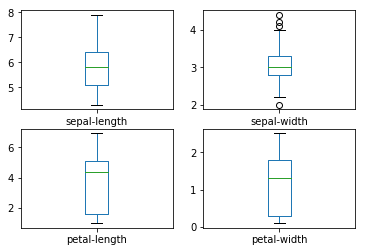

In [8]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

histograms,

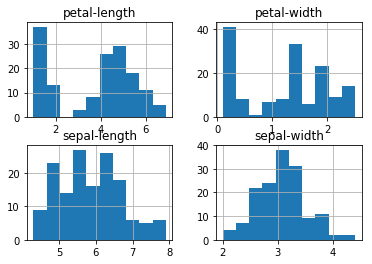

In [9]:
dataset.hist()
plt.show()

or the scatter plot we saw above, this time computed directly from the data:

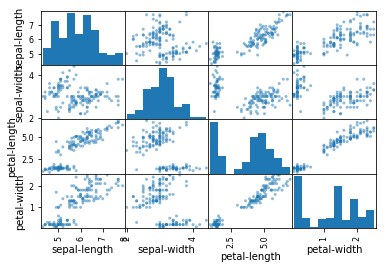

In [10]:
scatter_matrix(dataset)
plt.show()

## Training Vs. Validation

How do we make sure the methods will work in unseen data? We will split the available data in two arts: the *training* set and the *validation* set. We will use the training set to calibrate the models, and the validation set to check how they perform on "new" data.

We use the `model_selection` modeul from `sklearn` to split the datasets, labeling inputs `X` and outputs `Y` as usual.

In [11]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Calibrating the Models

We are ready to calibrate the models. Using a library like `sklearn` means we do not have to implement the models ourselves. These libraries provide several machine learning models:

 - Logistic Regression (LR)
 - Linear Discriminant Analysis (LDA)
 - K-Nearest Neighbors (KNN)
 - Classification and Regression Trees (CART)
 - Gaussian Naive Bayes (NB)
 - Support Vector Machines (SVM)
 
We will take this chance to evaluate and compare all the models against each other. First we place all the models in an array:

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Now we iterate through the models, calibrating them in portions of the training data, and evaluating them on other portions of the training data. This is known as **k-fold cross-validation**. We store a `results` array.

In [13]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


We can visualise the results using a plot:

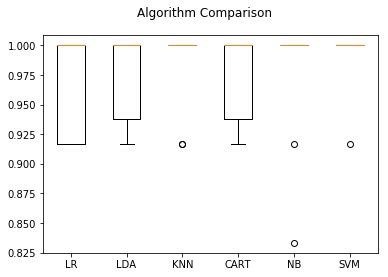

In [14]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Unseen Data

We will select one method, **K Nearest Neighbours**, *fit* it to the training data, and then use it to *predict* the outcome of the validation data:

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

We can show the *accuracy* of the prediction,

In [16]:
print(accuracy_score(Y_validation, predictions))

0.9


the *confusion matrix*,

In [17]:
print(confusion_matrix(Y_validation, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


and the *classification report*,

In [18]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

